In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Nueva sección

In [0]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [0]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://raw.githubusercontent.com/patricio-abalos/Laboratorio-NB-RL/master/lab_helper.py

In [0]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

# Generación de datos

In [0]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [0]:
X, y = generate_gaussians_distributions()
# X, y = generate_elipse_data()

# Graficamos

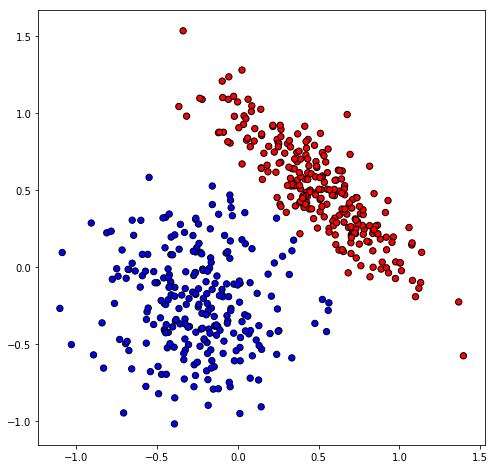

In [140]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [0]:
#model = GaussianNB(priors=None, var_smoothing=1e-9)
#model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)
model = LinearDiscriminantAnalysis(store_covariance=True)

In [142]:
# Entrenamiento del modelo
model.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)

In [0]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

In [0]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_

In [145]:
if type(model)==LinearDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_, model.covariance_

[0. 1.]


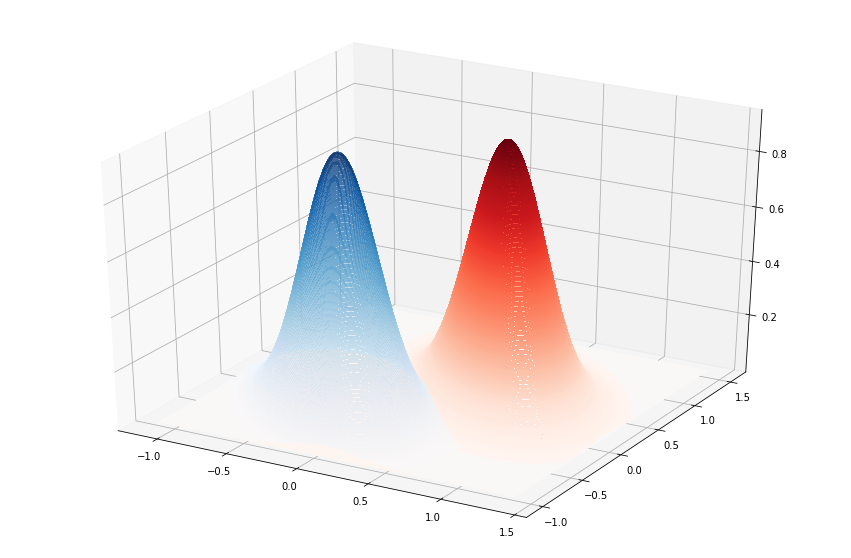

In [146]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

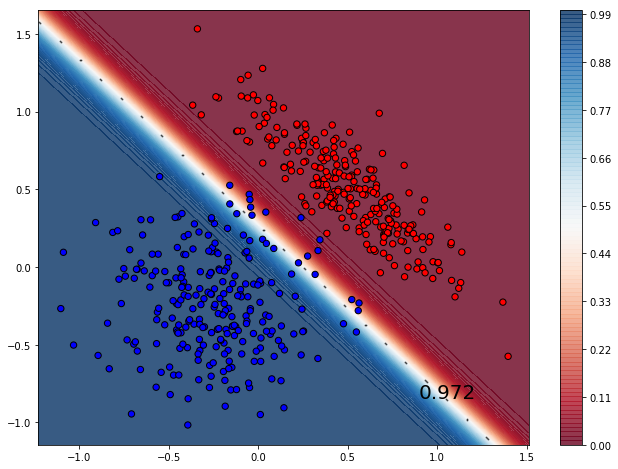

In [147]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [148]:
print(48/59)


0.8135593220338984


In [149]:
model.predict([[1.25,0.88],[-1,-1]])

array([0., 1.])